# 1. Importing Libraries

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from keras.models import Sequential
from keras.regularizers import l1
from keras import layers
import re
import matplotlib.pyplot as plt

In [39]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# 2. Read Dataset

In [2]:
dataset = pd.read_csv("IMDB Dataset.csv")

In [3]:
dataset.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


# 3. Proprocessing

In [4]:
# clearning the non alphanumeric
def clean_non_alphanumberic(text):
    return re.sub('[^a-zA-Z]', ' ', text)

In [5]:
# convert the text to lowercase
def lower(text):
    return text.lower()

In [6]:
# tokenize
def tokenization(text):
    return word_tokenize(text)

In [7]:
# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [item for item in tokens if item not in stop_words]

In [8]:
# lemmatization
lemmatizier = WordNetLemmatizer()
def lemmatization(tokens):
    return [lemmatizier.lemmatize(word=w) for w in tokens]

In [9]:
# remove the short length words
def remove_shortwords(tokens):
    return [word for word in tokens if len(word) > 2]

In [10]:
# preprocessing function
def preprocessing(text):
    # remove non alphanumberic
    new_text = clean_non_alphanumberic(text)
    # to lower
    new_text = lower(new_text)
    # tokenizing
    tokens = tokenization(new_text)
    # remove stopwords
    tokens = remove_stopwords(tokens)
    # lemmatizing
    tokens = lemmatization(tokens)
    # remove short words
    tokens = remove_shortwords(tokens)
    # remove 
    new_text = ' '.join(tokens)
    return new_text

In [11]:
# do preprocessing
dataset['preprocessed'] = dataset['review'].apply(preprocessing)

In [12]:
# convert sentiment value(positive and negative) to numerical value
# using labelencoder
sentiment_en = LabelEncoder()
dataset['sentiment'] = sentiment_en.fit_transform(dataset['sentiment'])

In [13]:
dataset.head(10)

,review,sentiment,preprocessed
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching episode hooked...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",1,probably time favorite movie story selflessnes...
6,I sure would like to see a resurrection of a u...,1,sure would like see resurrection dated seahunt...
7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea first aired...
8,Encouraged by the positive comments about this...,0,encouraged positive comment film looking forwa...
9,If you like original gut wrenching laughter yo...,1,like original gut wrenching laughter like movi...


# 4. Feature Engineering

#### 4.1 Convert the text to numerical data

In [13]:
vectorizer = CountVectorizer(min_df=30)
vectorized = vectorizer.fit_transform(dataset['preprocessed'])
# get vocabulary
vocabulary = vectorizer.vocabulary_

In [25]:
voc_size = len(vocabulary)
print("Vocabulary size is", voc_size)

Vocabulary size is 12318


In [15]:
# build the Input and Target Set
X = vectorized.toarray()
y = dataset.sentiment

In [26]:
print("Dataset size is ", len(X))

Dataset size is  50000


#### 4.2 split the dataset into Train and Test set

In [16]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
print("Train Set size is ", len(X_train))
print("Test Set size is ", len(X_test))

Train Set size is  40000
Test Set size is  10000


# 5. 1-Layer MLP

#### 5.1 Build the 1-Layer MLP model

In [53]:
# input dim is 12319 * 1
# output dim is 1
model = Sequential()
# regularizer is L1
# activation function is sigmoid
model.add(layers.Dense(1, activation='sigmoid', activity_regularizer=l1(0.0001)))
# optimizer is SGD
# loss function is binary_crossentropy
# model metric is accuracy
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [54]:
model.build(X_train.shape)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (40000, 1)                12319     
Total params: 12,319
Trainable params: 12,319
Non-trainable params: 0
_________________________________________________________________


#### 5.2 Train the model

In [55]:
# "Fit Model" (i.e. train model), using training data (80% of dataset)
batch_size = 20
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5521 - accuracy: 0.7587 - val_loss: 0.4180 - val_accuracy: 0.8351
Epoch 2/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3939 - accuracy: 0.8546 - val_loss: 0.3760 - val_accuracy: 0.8493
Epoch 3/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3530 - accuracy: 0.8696 - val_loss: 0.3543 - val_accuracy: 0.8587
Epoch 4/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3344 - accuracy: 0.8772 - val_loss: 0.3406 - val_accuracy: 0.8641
Epoch 5/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8879 - val_loss: 0.3336 - val_accuracy: 0.8696
Epoch 6/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3031 - accuracy: 0.8893 - val_loss: 0.3233 - val_accuracy: 0.8730
Epoch 7/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2913 - accuracy: 0.8937 - val_loss: 0.3176 - val_accuracy:

#### 5.3 evaluate the model

Training Accuracy: 0.9130
Testing Accuracy:  0.8856


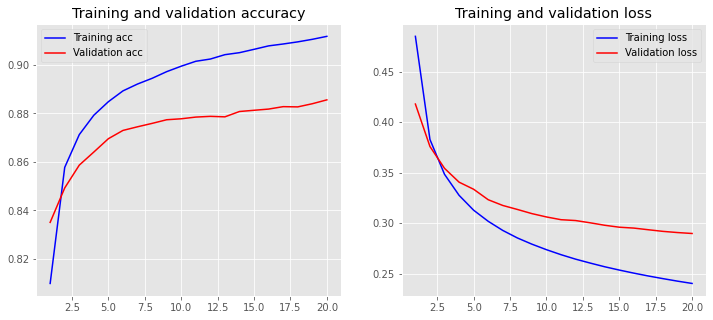

In [56]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# 6. 2-Layer MLP

#### 6.1 Build the 2-Layer MLP model

In [57]:
# input dim is 12319 * 1
# output dim is 1
model = Sequential()
# hidden layer
# activation function is relu
# regularizer is L1
model.add(layers.Dense(100, activation='relu', activity_regularizer=l1(0.0001)))
# activation function is sigmoid
model.add(layers.Dense(1, activation='sigmoid'))
# optimizer is Adam
# loss function is binary_crossentropy
# model metric is accuracy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [58]:
model.build(X_train.shape)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (40000, 100)              1231900   
_________________________________________________________________
dense_11 (Dense)             (40000, 1)                101       
Total params: 1,232,001
Trainable params: 1,232,001
Non-trainable params: 0
_________________________________________________________________


#### 6.2 Train the model

In [59]:
# "Fit Model" (i.e. train model), using training data (80% of dataset)
batch_size = 20
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/20
2000/2000 [==============================] - 14s 7ms/step - loss: 0.3556 - accuracy: 0.8486 - val_loss: 0.2741 - val_accuracy: 0.8874
Epoch 2/20
2000/2000 [==============================] - 14s 7ms/step - loss: 0.1462 - accuracy: 0.9453 - val_loss: 0.3046 - val_accuracy: 0.8842
Epoch 3/20
2000/2000 [==============================] - 14s 7ms/step - loss: 0.0604 - accuracy: 0.9826 - val_loss: 0.4177 - val_accuracy: 0.8856
Epoch 4/20
2000/2000 [==============================] - 14s 7ms/step - loss: 0.0183 - accuracy: 0.9964 - val_loss: 0.5373 - val_accuracy: 0.8817
Epoch 5/20
2000/2000 [==============================] - 13s 7ms/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.5983 - val_accuracy: 0.8812
Epoch 6/20
2000/2000 [==============================] - 13s 7ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.5755 - val_accuracy: 0.8832
Epoch 7/20
2000/2000 [==============================] - 14s 7ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.5527 - val_ac

#### 6.3 evaluate the model

Training Accuracy: 0.9998
Testing Accuracy:  0.8622


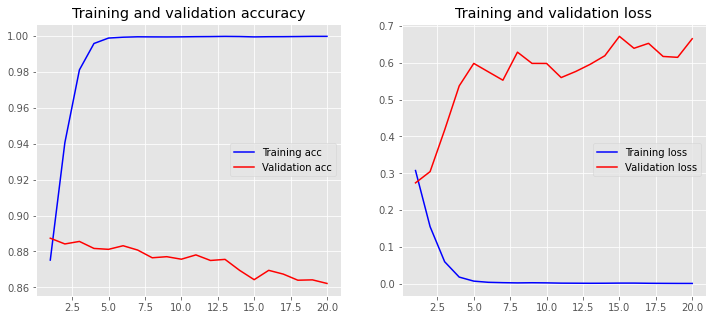

In [60]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)